In [3]:
#Анализ и разбор материала по данному руководству - https://www.kaggle.com/hasanburakavci/titanic-eda-and-classification

In [4]:
#Глава 1: загрузка и проверка данных

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import os
for dirname, _, filenames in os.walk('/Kaggle/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/Kaggle/Input\titanic\gender_submission.csv
/Kaggle/Input\titanic\test.csv
/Kaggle/Input\titanic\train.csv


In [6]:
train_data = pd.read_csv('/Kaggle/Input/titanic/train.csv') #Чтение обучающих файлов
test_data = pd.read_csv('/Kaggle/Input/titanic/test.csv') #Чтение тестовых файлов
train_data.columns #Какие колонки имеются

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.head() #Вывод примера таблицы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.info() #Какие колонки, типы данных, количество элементов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 1Выявление аномалий

In [10]:
train_data.describe() #выводит стандартное отклонение набора данных

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
def outlier_detect(feature, data):
    outlier_index = []
    
    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        outlier_list = data[(data[each] < Q1 - 1.5*IQR) | (data[each] > Q3 + 1.5*IQR)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    outlier_data = list(i for i, v in outlier_index.items() if v > 2)
    return outlier_data

In [12]:
outlier_data = outlier_detect(['Age', 'SibSp', 'Parch', 'Fare'], train_data)
train_data.loc[outlier_data]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [13]:
#train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

In [14]:
# 2 - Комбинирование учебных и проверочных данных
#Train_data и test_data объединяются таким образом, чтобы получить данные.

In [15]:
data = pd.concat([train_data, test_data], axis = 0).reset_index(drop=True)

In [16]:
#3 - Анализ признаков

#Object

    # 1. Name :
    # 2. Sex : male and female
    # 3. Ticket : ticket number
    # 4. Cabin : cabin category
    # 5. Embarked : port C, Q and S

#Int64

    # 1. PassengerId : unique id number
    # 2. Survived : 0 -> died ,1-> survived
    # 3. Pclasss : 1, 2 and 3
    # 4. SibSp : number of siblings/spouse
    # 5. Parch : number of parent/children

#Float64

    # 1. Age : age of passenger
    # 2. Fare : price of the ticket

In [17]:
#Survived

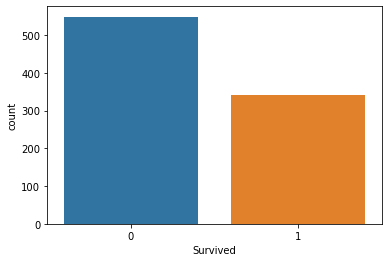

In [18]:
sns.countplot('Survived', data = train_data)

In [21]:
data.describe() #выводит стандартное отклонение набора данных

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [22]:
#Глава 2: Анализ данных

In [23]:
#1- Feature Analysis
    #Sex - Survived
    #Pclass - Survived
    #Embarked - Survived
    #SibSp - Survived
    #Parch - Survived
    #Age - Survived
    #Fare - Survived

In [26]:
#Sex - Survived
#Female are more likely to survive than male.

data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<function matplotlib.pyplot.show(*args, **kw)>

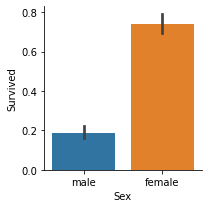

In [31]:
g = sns.factorplot (x = 'Sex', y = 'Survived', data = data, kind='bar', size = 3)
plt.show

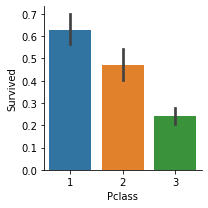

In [32]:
#Pclass - Survived

sns.factorplot(x="Pclass", y ="Survived", data=data, kind="bar", size=3)
plt.show()

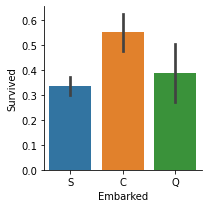

In [33]:
#Embarked - Survived

sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()

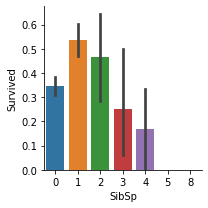

In [34]:
#SibSp - Survived

sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()

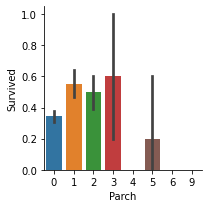

In [35]:
#Parch - Survived

sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()

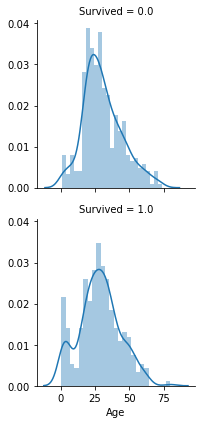

In [36]:
#Age - Survived

g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

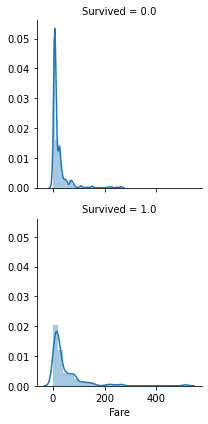

In [37]:
#Fare - Survived

g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

In [38]:
#2-Colelation Between Features

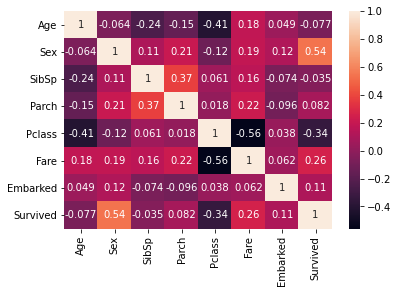

In [39]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

In [40]:
#Outcome

#Sex, Pclass, Fare and Embarked are associated with Survived.

In [41]:
#Глава 3 - Отсутствующие значения
#Найти недостающие значения
#Заполнить недостающие значения

In [42]:
#1 - Find Missing Value \ Найти недостающие значения

In [44]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [45]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [47]:
#2-Fill Missing Value \  Заполнение недостающих данных

# Cabin has 1007 missing value Age has 256 missing value  Embarked has 2 missing value Fare has 1 missing value

#Not: Survived has 418 missing value (only test value)

#Fare Fill Value

In [50]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [51]:
data['Fare'] = data['Fare'].fillna(np.median(data[((data['Pclass'] == 3) & (data["Embarked"] == 0 ))]['Fare']))
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [52]:
#Embarked Fill Value
#S = 0, C = 1 and Q = 2

In [53]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [54]:
data['Embarked'] = data['Embarked'].fillna(0)
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [55]:
# Age Fill Value
    #Age feature will be done later

In [56]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


In [57]:
#Глава 4 - Data Engineering
    #New Feature
    #Edit Feature
    #Drop Feature
    #Normalization
    
   # 1-New - Feature
        #Alone and Family Size
        #Name - Title
        #Age Missing Value
        #Age Limit
        
    #Family
        #SibSp + Parch = family

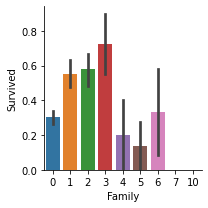

In [59]:
data['Family'] = data['SibSp'] + data['Parch']
sns.factorplot(x = 'Family', y = 'Survived', data = data, kind = 'bar', size = 3)
plt.show()

In [60]:
data['Family'].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0


In [61]:
#Name - Title

In [62]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.')

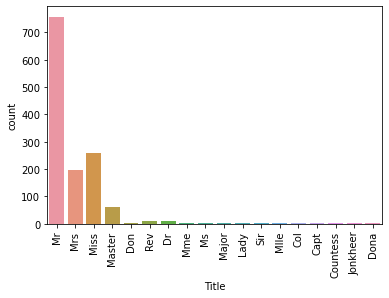

In [67]:
sns.countplot(data['Title'])
plt.xticks(rotation = 90)
plt.show()

In [68]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

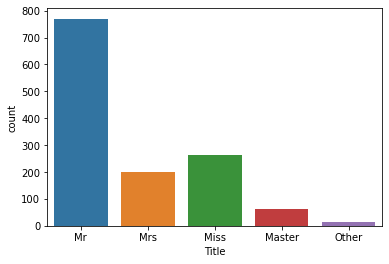

In [69]:
sns. countplot(data['Title'])
plt.show()

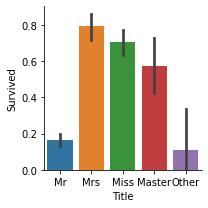

In [70]:
sns.factorplot(x = 'Title', y = 'Survived', data = data, kind = 'bar', size = 3)
plt.show()

In [71]:
data['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [1, 2, 3, 4, 5], inplace = True)

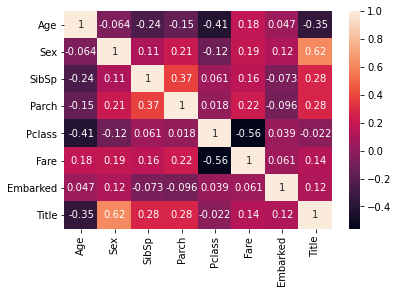

In [74]:
#Age Missing Value

sns.heatmap(data[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass', 'Fare', 'Embarked', 'Title']].corr(), annot = True)

In [75]:
data_age_nan_index = data[data['Age'].isnull()].index

for i in data_age_nan_index:
    mean_age = data['Age'][(data['Pclass']==data.iloc[i]['Pclass'])].median()
    data['Age'].iloc[i] = mean_age

In [76]:
data['Title'].replace([1, 2, 3, 4, 5], [1, 2, 2, 3, 1], inplace = True)

In [77]:
#Age Limit

data['Age_Limit'] = pd.cut(data['Age'], 5)
data.groupby(['Age_Limit'])['Survived'].mean()

Age_Limit
(0.0902, 16.136]    0.550000
(16.136, 32.102]    0.336714
(32.102, 48.068]    0.412844
(48.068, 64.034]    0.434783
(64.034, 80.0]      0.090909
Name: Survived, dtype: float64

In [78]:
data['Age_Limit'] = 0
data.loc[data['Age'] <= 16, 'Age_Limit'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_Limit'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_Limit'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 60), 'Age_Limit'] = 3
data.loc[data['Age'] > 60, 'Age_Limit'] = 4

In [79]:
#Fare Limit

data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [80]:
data['Fare_Limit']=0
data.loc[data['Fare'] <= 7.91, 'Fare_Limit']=0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_Limit'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_Limit'] = 2
data.loc[data['Fare'] > 31, 'Fare_Limit'] = 3

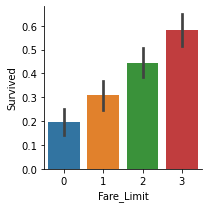

In [81]:
sns.factorplot(x = 'Fare_Limit', y = 'Survived', data = data, kind = 'bar', size = 3)
plt.show()

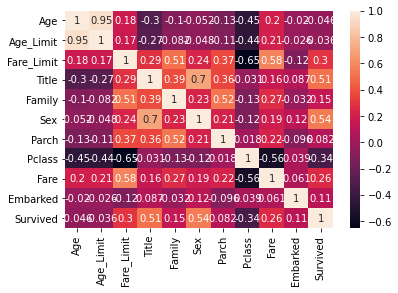

In [82]:
#Corelation Matrix

sns.heatmap(data[["Age","Age_Limit","Fare_Limit", "Title","Family","Sex","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

In [83]:
#2- Drop Features \ 
        
    #Ticket, Cabin, Name, PassengerId, Sibsp, Parch and Age are deleted according to the result of the corelation matrix.

In [84]:
data.drop(labels = ['Fare', 'Fare_Range', 'Ticket', 'Cabin', 'Name', 'PassengerId', 'Age'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family,Title,Age_Limit,Fare_Limit
0,0.0,3,0,1,0,0.0,1,1,1,0
1,1.0,1,1,1,0,1.0,1,2,2,3
2,1.0,3,1,0,0,0.0,0,2,1,1
3,1.0,1,1,1,0,0.0,1,2,2,3
4,0.0,3,0,0,0,0.0,0,1,2,1


In [85]:
#3 - One Hot Encoding

data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["SibSp"])
data = pd.get_dummies(data,columns=["Parch"])
data = pd.get_dummies(data,columns=["Sex"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])

data.head()

,Survived,Title,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Family_2,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
0,0.0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1.0,2,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,2,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,2,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [88]:
# Глава 5 - Моделирование

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [89]:
# 1-Train Test Split \ 

In [90]:
if len(data) == (len(train_data) + len(test_data)):
    print('Success')

Success


In [91]:
test = data[len(train_data):]
test.drop(labels = 'Survived', axis = 1, inplace = True)

In [94]:
train = data[:len(train_data)]
X_train = train.drop(labels = 'Survived', axis = 1)
y_train = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [95]:
 #2-Classificaiton Methods
        #Logistic Regression
        #Random Forest Regression
        #Support Vector Machine (SVM)
        #K-Nearest Neighbors (KNN)

In [96]:
#Logistic Regression \ Логистическая регрессия

In [97]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
print('Train Accuracy: ', log_reg.score(X_train, y_train))
print('Test Accuracy: ', log_reg.score(X_test, y_test))

Train Accuracy:  0.8323353293413174
Test Accuracy:  0.8161434977578476


In [98]:
#Random Forest Regression \ Случайная лесная регрессия

In [99]:
rf_reg = RandomForestClassifier(random_state = 42)
rf_reg.fit(X_train, y_train)
print('Train Accuracy: ', rf_reg.score(X_train, y_train))
print('Test Accuracy: ', rf_reg.score(X_test, y_test))

Train Accuracy:  0.8922155688622755
Test Accuracy:  0.8116591928251121


In [100]:
#Support Vector Machine (SVM) \ Машина опорных векторов

In [101]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print('Train Accuracy: ', svm_clsf.score(X_train, y_train))
print('Test Accuracy: ', svm_clsf.score(X_test, y_test))

Train Accuracy:  0.844311377245509
Test Accuracy:  0.8340807174887892


In [102]:
#KNN \ 

In [106]:
best_knn = []
for n in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test, y_test))
best_knn

[0.8161434977578476,
 0.8071748878923767,
 0.820627802690583,
 0.8161434977578476,
 0.820627802690583,
 0.820627802690583,
 0.8385650224215246,
 0.8295964125560538,
 0.820627802690583,
 0.8251121076233184,
 0.8161434977578476]

In [108]:
knn_clsf = KNeighborsClassifier(n_neighbors = 7)
knn_clsf.fit(X_train, y_train)
print('Train Accuracy: ', knn_clsf.score(X_train, y_train))
print('Test Accuracy: ', knn_clsf.score(X_test, y_test))

Train Accuracy:  0.8502994011976048
Test Accuracy:  0.8385650224215246


In [109]:
#3 - Ensemble Modeling \ Ансамбль методов

In [111]:
voting_classification = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svm', svm_clsf), ('knn', knn_clsf)], voting = 'hard', n_jobs = -1)
voting_classification.fit(X_train, y_train)
print('Train Accuracy: ', voting_classification.score(X_train, y_train))
print('Test Accuracy: ', voting_classification.score(X_test, y_test))

Train Accuracy:  0.8473053892215568
Test Accuracy:  0.8295964125560538


In [113]:
#4-Result \ Результат

test_result = pd.Series(voting_classification.predict(test), name = 'Survived').astype(int)
results = pd.concat([test_data['PassengerId'], test_result], axis = 1)
results.to_csv('hba_titanic_eda.csv', index=False)